# Lab 1: Exploratory Data Analysis (EDA)

# Question: Does an individual's Balance and Marital Status affect the chance of them subscribing to a term deposit?

#### Importing Modules and Dataset

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv(r'C:\Users\cians\OneDrive - University of Limerick\4th Year - Computer Systems\Sem 2\CS4168 - Data Mining\bank.csv')

# Quick Data Exploration

In [55]:
# Print first 5 rows - the head
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [56]:
# Print last 5 rows - the tail
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [57]:
# The dimensions of the bank.csv dataframe
df.shape

(2000, 17)

The dataframe contains 2000 rows which each have 17 data columns made of numerical as well as categorical data attributes.

# Calculate statistics for the numerical and categorical attributes

#### Quick Examination of Numerical Attributes

In [58]:
# Print statistical summary for all numerical attributes
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


- `age` has (2000 – 1988) 12 missing values.

In [59]:
df.isnull().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

We can draw the following conclusions that:
- `age` has 12 missing values.
- `job` has 10 missing values.
- `education` has 104 missing values.
- `contact` has 191 missing values.
- `poutcome` has 454 missing values.

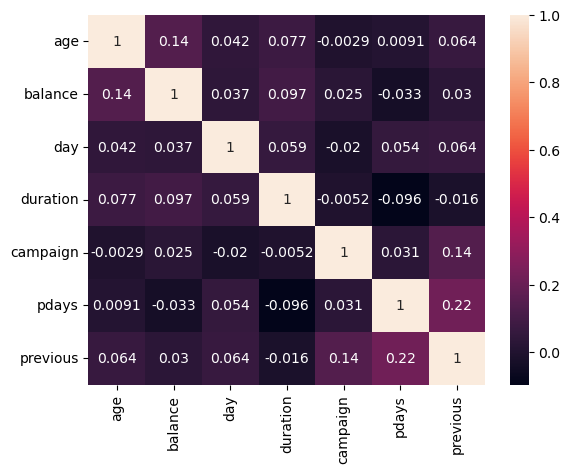

In [60]:
#correlation matrix
sns.heatmap(df.corr(), annot=True);

From this heatmap we can draw the following conclusions:

- There is a correlation greater than 0 between `age` and `balance`
- There is a correlation greater than 0 between `pdays` and `previous`
- There is a small correlation slighly larger than 0 between `campaign` and `previous`
- There is a small correlation slighly larger than 0 between `duration` and `balance`

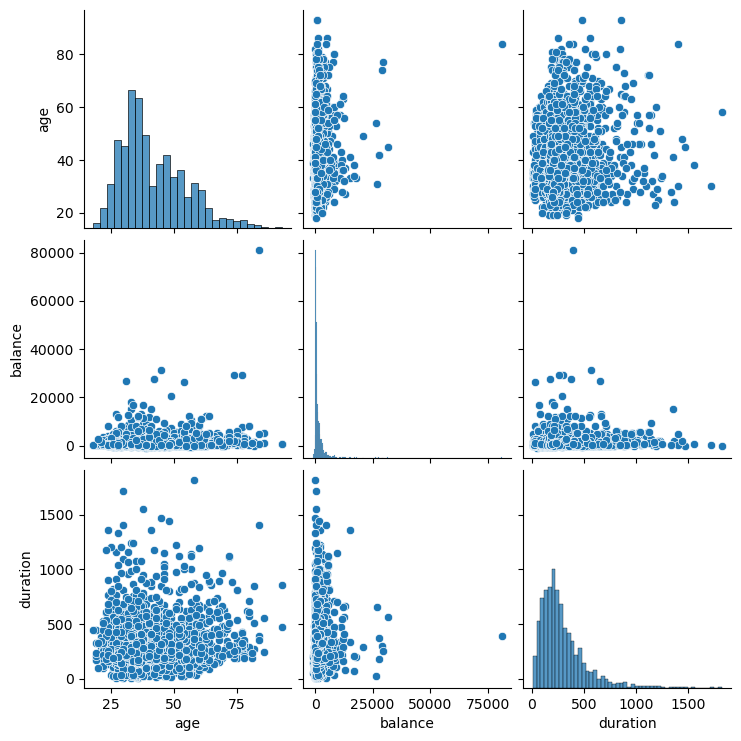

In [61]:
# Drop rows with missing values
sns.pairplot(data = df[['age','balance','duration']].dropna())
plt.show()

Observations drawn from the graphs shown above:

- The `age` of clients are most commonly between 25 and 40
- The `balance` of clients most commonly lies between 0 to 20,000 
- The `duration` is most commonly between 0 and 500

In [62]:
df['subscribed'].value_counts()

no     1000
yes    1000
Name: subscribed, dtype: int64

Here we see 1000 individials have and 1000 individuals have not subscribed to the term deposit

#  Plot the distribution of some numerical attributes

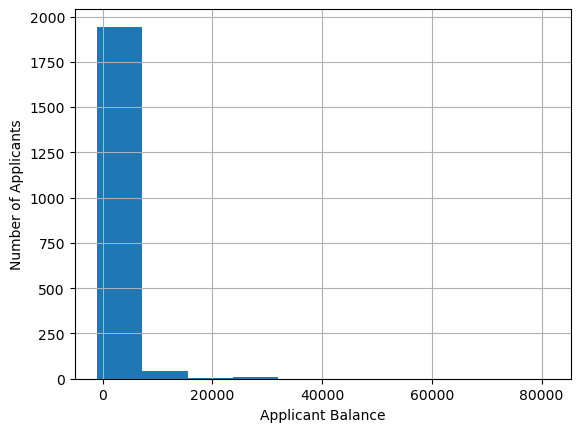

In [63]:
df['balance'].hist()
plt.xlabel('Applicant Balance')
plt.ylabel('Number of Applicants')
plt.show()

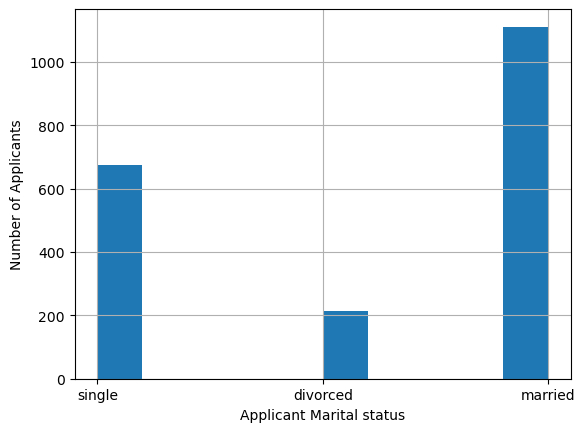

In [64]:
df['marital'].hist()
plt.xlabel('Applicant Marital status')
plt.ylabel('Number of Applicants')
plt.show()

- Over 1000 clients are married
- Over 600 clients are single
- Just over 200 clients are divorced

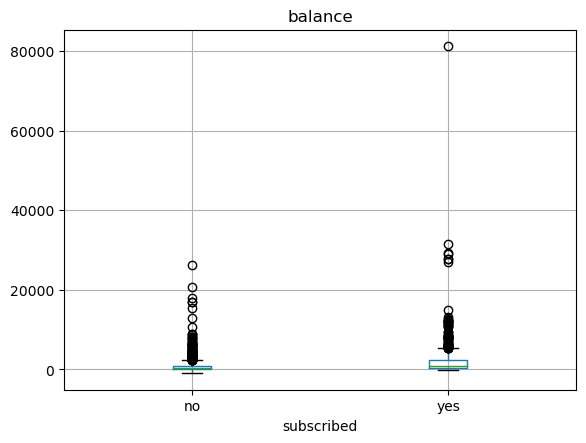

In [65]:
df.boxplot(column = 'balance', by = 'subscribed')
plt.suptitle("")
plt.show()

This shows the `balance` of those who subscribed to the term deposit and those that did not subscribe.

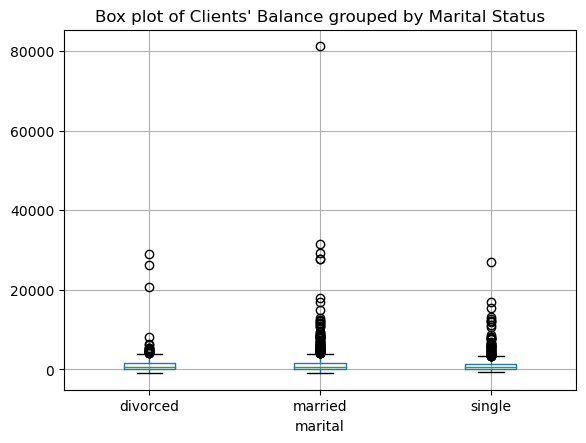

In [66]:
df.boxplot(column = 'balance', by = 'marital')
plt.title('Box plot of Clients\' Balance grouped by Marital Status')
plt.suptitle("")
plt.show()

- Married clients most commonly have a balance between 0 - 20,000
- Single clients have a similar balance
- Divorced clients have a noticeable lower balance between 0 - 10,000
- `married` is an extreme outlier column with one client balance being over 80,000

### Generate two plots with the combined distribution of attributes and draw conclusions from them

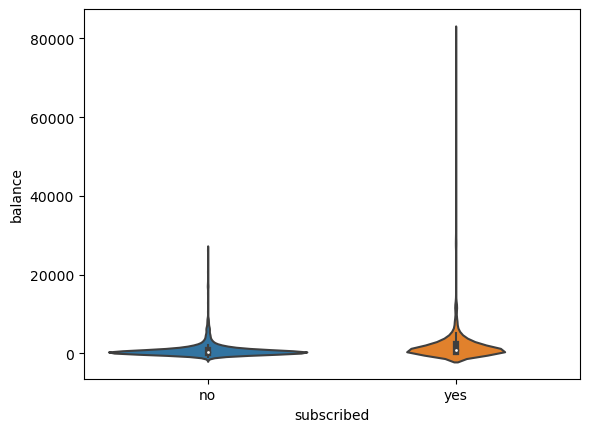

In [67]:
sns.violinplot(data = df, x='subscribed', y='balance')
plt.show()

Here, we can see the subscribers have a wider `balance` distribution than the non-subscribers. 

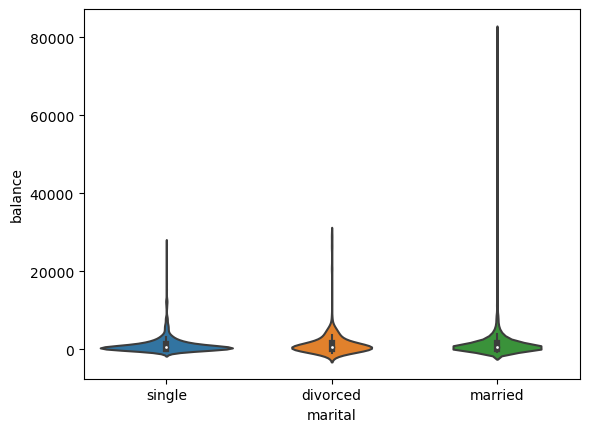

In [68]:
sns.violinplot(data = df, x='marital', y='balance')
plt.show()

Clients in  the `single` or `divorced` group have a similar distribution while the highest client balance is found in the `married` group.

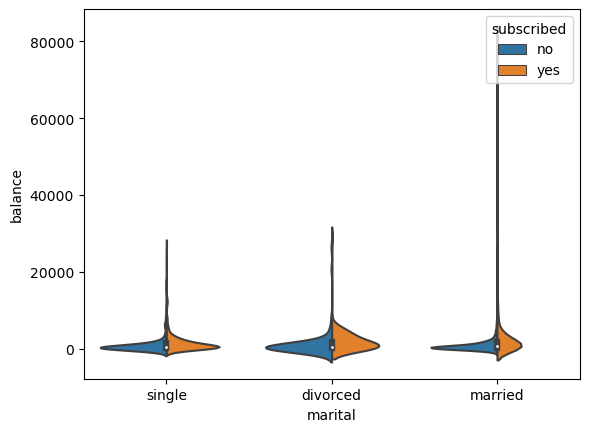

In [69]:
sns.violinplot(data = df, x='marital', y='balance', hue='subscribed', split=True)
plt.show()

- `single` subscribers are more evenly distributed than non-subscribers who are `single` however the distrubiton is very similar.
- `divorced`  subscribers are more evenly distributed than non-subscribers who are `divorced` however the distrubiton is somewhat similar.
- `married` subscribers are more evenly distributed than non-subscribers who are `married`

<AxesSubplot:xlabel='marital', ylabel='balance'>

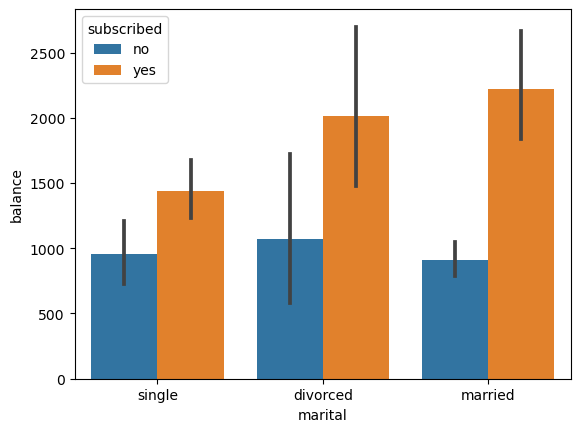

In [70]:
sns.barplot(hue = 'subscribed', x = 'marital', y = 'balance', data = df)

In the graph shown above we can see that a higher `balance` of clients have subscribed across the spectrum.
We can see that `married` clients have a higher average, followed closely by `divorced` clients and then by `single` clients. 

- `married` clients who subscribed have a higher average balance compared to `married` clients that did not subscribe.
- `divorced` clients who subscribed have a higher average balance compared to `divorced` clients that did not subscribe.
- `single` clients who subscribed have a higher average balance compared to `single` clients that did not subscribe.
- The highest average balance can be found in `married` clients who have subscribed, however the average balance of `divorced` clients who subscribed is very similar.
- The lowest average balance can be found in `married` clients who have not subscribed. It is the lowest average of the non-subscribers.
- The lowest average balance of clients that did subscribe can be found in `single` clients.

### Conclusions & Findings

- Clients who have subscribed to the term deposit have a higher balance distribution compared to the non-subscribers.
- Subscribers in each marital status have more evenly distributed balances than non-subscribers.
- Married clients who have not subscribed have the lowest average balance.
- Married clients with higher balances are more likely to have subscribed.